# Fourier Transforms

## Four types of Fourier Transforms
(ref: page 68)

### Continuous and Periodic - Fourier Series
When you first encounter concept of "Fourier Transforms", the one you have most likely seen is the approximation of a sawtooth curve with sinusosids: https://www.desmos.com/calculator/ts7fnmnccv
There is an expression to evaluate the Fourier Series:

(page 68 formula 3)

### Continuous and Aperiodic 
Any finite energy curve in the real (and even complex) can be expressed as a sum of sinusosids (exponentials with zero real part).

(page 68 formula 1)

### Discrete and Aperiodic
If the finite energy curve is made up of discrete points, we will can calculate its Fourier transform

(page 68 formula 2)

### Discrete and Periodic
This is the one we are concerned with here. When people or code libraries refer to FFT (Fast Fourier Transform), they are essentially refering to this as well. FFT is merely a fast implmentation of DFT (n log n compared to n squared).

(page 68 formula 4)

The $1/\sqrt{N}$ coefficeint. For most signal processing code, even in numpy, the FFT has a $1/N$ coefficient while the iFFT does not have a coefficient attach. The mathematicians minority apply $1/\sqrt{N}$ to both transforms. The engineers prefers a more straightforward construction of the time domain, while mathematicians want to preserve the orthonormality of the linear transformation.

For further reading on the differences, please refer to:
https://stevetjoa.com/static/notes322_20091119.pdf
http://www.dspguide.com/ch8/1.htm

To add: concept of time domain and freqency domain
May add: typing out the formulas



## Discrete Fourier Transform

## Properties
Following is the code to take the FFT

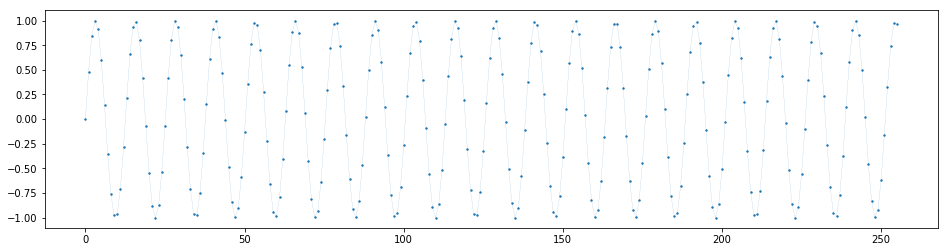

In [72]:
import numpy as np
import matplotlib.pyplot as plt
signal = [np.sin(x/2.) for x in range(256)]
# signal = [np.sin(x/2.) + 0.1*np.random.randn() for x in range(256)]  # add noise
plt.figure(figsize=(16,4))
plt.scatter(np.arange(len(signal)),signal, s = 2)  # our data is essentially only a set of points
plt.plot(np.arange(len(signal)),signal, lw = 0.1)  # connect the dots to show osciallations
plt.show()

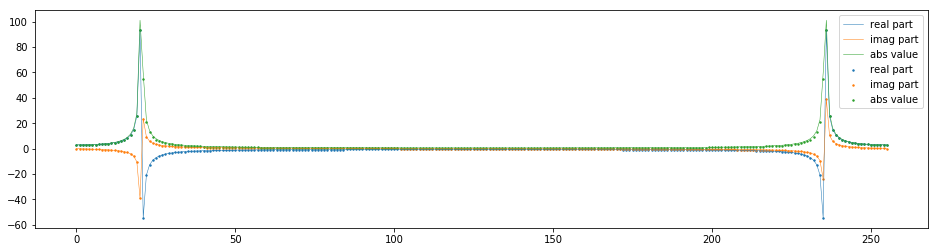

In [84]:
plt.figure(figsize=(16,4))

signal_fft = np.fft.fft(signal)

plt.scatter(np.arange(len(signal)),signal_fft.real, label = "real part", s = 2)
plt.scatter(np.arange(len(signal)),signal_fft.imag, label = "imag part", s = 2)
plt.scatter(np.arange(len(signal)),np.absolute(signal_fft.real), label = "abs value", s = 2)

plt.plot(signal_fft.real, label = "real part", lw = 0.5)  # connecting the dots
plt.plot(signal_fft.imag, label = "imag part", lw = 0.5)
plt.plot(np.absolute(signal_fft), label = "abs value", lw = 0.5)

plt.legend(loc="best")
plt.show()

Notice the symmetry of the frequency domain. How many pieces of information take the FFT takes? How many pieces of information are produced?

This is one property of the discrete Fourier transform:
If the time domain is made up of a signal that is real only,
$$f(k) = \overline{f(- k)}$$
where $\hat{x}$ is the complex conjugate of $x$

### Product - Convolution
We often like to apply a window to our time domain. This is to focus on the oscillations in the middle of the snippet, and to avoid arupt a jumps at the end (since DFT assumes the signal is periodic). 

This is the same signal with the window superimposed on it:

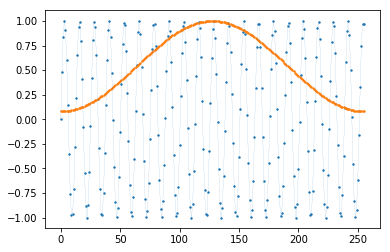

In [85]:
plt.scatter(np.arange(len(signal)),signal, s = 2)  # our data is essentially only a set of points
plt.plot(np.arange(len(signal)),signal, lw = 0.1)  # connect the dots to show osciallations

window = np.hamming(len(signal))
plt.scatter(np.arange(len(signal)),window, s = 2)  # our data is essentially only a set of points
plt.plot(np.arange(len(signal)),window, lw = 0.1)  # connect the dots to show osciallations

plt.show()


Multiplying them element wise:

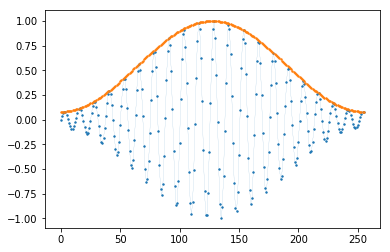

In [86]:
signal_windowed = np.multiply(signal,window)

plt.scatter(np.arange(len(signal)),signal_windowed, s = 2)  # our data is essentially only a set of points
plt.plot(np.arange(len(signal)),signal_windowed, lw = 0.1)  # connect the dots to show osciallations

plt.scatter(np.arange(len(signal)),np.hamming(len(signal)), s = 2)  # our data is essentially only a set of points
plt.plot(np.arange(len(signal)),np.hamming(len(signal)), lw = 0.1)  # connect the dots to show osciallations

plt.show()

Taking the fourier transform:

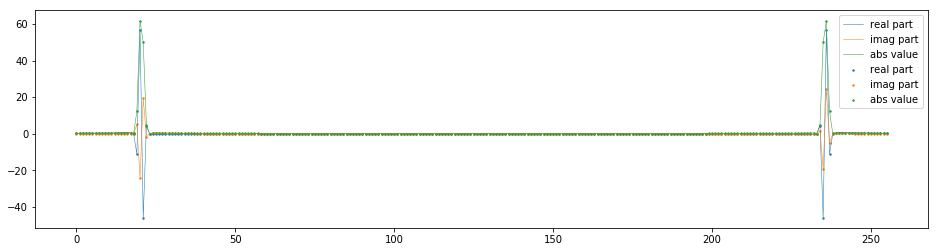

In [88]:
plt.figure(figsize=(16,4))  # set up figure with specified size in inches

signal_windowed_fft = np.fft.fft(signal_windowed)

plt.scatter(np.arange(len(signal)),signal_windowed_fft.real, label = "real part", s = 2)
plt.scatter(np.arange(len(signal)),signal_windowed_fft.imag, label = "imag part", s = 2)
plt.scatter(np.arange(len(signal)),np.absolute(signal_windowed_fft), label = "abs value", s = 2)

plt.plot(signal_windowed_fft.real, label = "real part", lw = 0.5)  # connecting the dots
plt.plot(signal_windowed_fft.imag, label = "imag part", lw = 0.5)
plt.plot(np.absolute(signal_windowed_fft), label = "abs value", lw = 0.5)

plt.legend(loc="best")
plt.show()

Compare with the FFT of the unwindowed signal. 

The FFT of the windowed signal has near zero values outside of the peaks, but the peak is now broader, increasing the uncertainty of the exact position of the peak. If there may many peaks close together, they might combine and be inaccurately evaluated as one peak only.

May add: Multiplication in one domain implies concolution in another domain.